In [1]:
import matplotlib.pyplot as plt
import glob

In [2]:
%matplotlib inline

In [3]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [4]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [30]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]
msre_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))
        msre_results[i].append(fitter.ms_rel_err(fitter.curve))

  0%|          | 0/1000 [00:00<?, ?it/s]/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [03:38<00:00,  4.59it/s]


In [31]:
R2_results = np.asarray(R2_results)
maxerror_results = np.asarray(maxerror_results)
msre_results = np.asarray(msre_results)

In [32]:
maxerror_results[0]

array([1.19117584e+03, 1.25064933e+02, 7.11819591e+02, 7.97159899e+00,
       2.57883318e+02, 5.27357185e-01, 1.87621357e+03, 8.60825587e+00,
       2.80127363e+03, 4.36540363e+01, 1.14389440e+02, 1.21115584e+02,
       6.61883320e+01, 3.31396350e+02, 2.99481286e+01, 1.68429801e+02,
       2.40082777e+01, 2.80012888e+01, 2.28436726e+02, 4.20804647e-01,
       3.05397317e+01, 5.11290441e+00, 7.60503597e+00, 5.57746834e+00,
       1.81750965e+01, 2.06529106e+01, 8.58792737e-01, 1.98150077e+02,
       1.50508028e+02, 1.35255675e+00, 1.26050969e+00, 2.02951877e+01,
       5.90128748e+00, 2.32588022e+02, 6.50455445e+00, 1.36221970e+02,
       3.24017614e+01, 9.05589382e+00, 5.19581408e+02, 2.02159598e+01,
       8.46741661e+00, 7.18265482e+03, 9.86019981e+00, 5.04920086e+01,
       2.65940351e+02, 3.24767266e+01, 4.90665817e-01, 1.13700567e+01,
       9.56468814e+00, 2.99590792e+01, 4.11115663e+02, 1.20219407e+02,
       6.07244789e+02, 3.10770376e+01, 1.09352784e+01, 5.12850134e+01,
      

In [33]:
msre_results[0]

array([1.81247307e-01, 1.81582681e-02, 1.85239027e-01, 3.23021172e-03,
       7.17713776e-02, 5.48394208e-04, 8.16225175e-02, 3.21489749e-03,
       1.04785711e-01, 3.15186932e-03, 1.88150227e-02, 2.02827031e-02,
       1.70129507e-02, 6.84515303e-02, 1.56125445e-02, 1.34420727e-01,
       2.70513493e-03, 3.41224003e-03, 1.40637532e-02, 1.18629036e-02,
       4.32376880e-03, 2.48886888e-03, 5.49492949e-03, 4.30661657e-03,
       3.61969552e-03, 5.36084814e-03, 1.31736483e-03, 1.45457082e-02,
       1.43031686e-01, 4.58287999e-04, 9.21627894e-04, 4.43016653e-03,
       4.41830066e-03, 6.73479755e-02, 3.12670745e-03, 1.03744715e-01,
       8.54737160e-03, 3.00587597e-03, 1.34558551e-01, 1.73079183e-02,
       2.78165360e-03, 1.89657402e-01, 4.49512912e-03, 7.14843769e-03,
       8.38457046e-02, 3.22847874e-02, 1.00051000e-02, 4.17725057e-03,
       6.08850760e-03, 1.42852929e-02, 9.84560763e-02, 1.67420591e-02,
       1.29689735e-01, 1.22979457e-02, 2.75854346e-03, 3.06006896e-03,
      

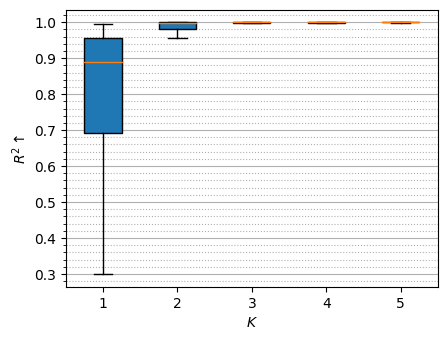

In [34]:
plt.figure(figsize=(4.8, 3.6))

plt.xlabel("$K$")

plt.ylabel(r"$R^2\uparrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(R2_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig("./K_Exp_R2.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_R2.pdf", bbox_inches="tight")

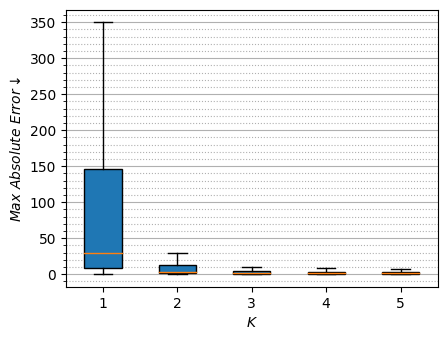

In [36]:
plt.figure(figsize=(4.8, 3.6))

plt.xlabel("$K$")

plt.ylabel(r"$Max~Absolute~Error\downarrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(maxerror_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp_maxerr.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_maxerr.pdf", bbox_inches="tight")

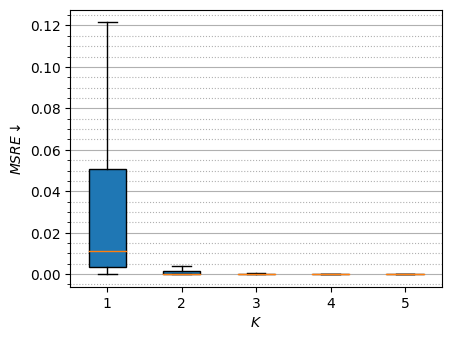

In [37]:
plt.figure(figsize=(4.8, 3.6))

plt.xlabel("$K$")

plt.ylabel(r"$MSRE\downarrow$")
plt.tick_params(axis="x", which="minor", bottom=False)

plt.minorticks_on()

plt.boxplot(list(msre_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp_msre.png", dpi=300, bbox_inches="tight")
plt.savefig("./K_Exp_msre.pdf", bbox_inches="tight")

/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2
[0.4027854129542061, 0.9859910178883391, 0.9972510286258126, 0.9999951243898502, 0.9999564701236372] [2801.2736334906335, 401.3655668647407, 179.4053471121888, 6.4881550500226695, 21.23917470433298]


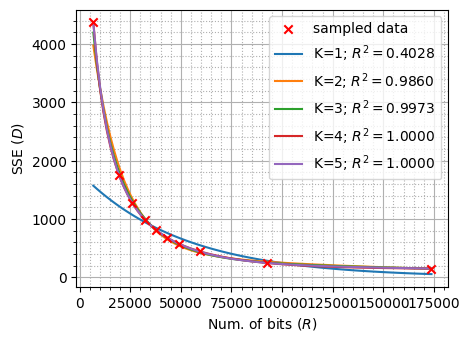

In [38]:
filename = cache_glob[8]
plt.figure(figsize=(4.8, 3.6))
curve = FitKExp.load(filename)
X = curve.X
Y = curve.Y
fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
R2 = []
Maxerr = []
for i, fitter in enumerate(fitters):
    r2 = fitter.R2(fitter.curve)
    maxerr = fitter.maxerror(fitter.curve)
    if i>1 and r2-R2[-1]>0.01:
        print(i)
    R2.append(r2)
    Maxerr.append(maxerr)
print(R2, Maxerr)
plt.scatter(X, Y, zorder=100, marker='x', color='red', label="sampled data")
rng = np.linspace(X.min(), X.max(), 100)
for i, fitter in enumerate(fitters):
    plt.plot(rng, fitter.curve(rng), label=f"K={i+1}; $R^2={fitter.R2(fitter.curve):.4f}$")
plt.legend()
plt.savefig("K_Exp_sample.png", dpi=300)
plt.minorticks_on()
plt.grid(which='major', axis='both')
plt.grid(which='minor', axis='both', linestyle=':')
plt.xlabel("Num. of bits ($R$)")
plt.ylabel("SSE ($D$)")
plt.savefig("K_Exp_sample.pdf", bbox_inches="tight")
plt.savefig("K_Exp_sample.png", dpi=300, bbox_inches="tight")